In [153]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import joblib
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok

In [94]:
df=pd.read_csv('/kaggle/input/student-final-grade-prediction-multi-lin-reg/student-mat.csv')

In [42]:
df.head()

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [43]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Parrent_status',
       'Mother_edu', 'Father_edu', 'Mother_job', 'Father_job',
       'reason_to_chose_school', 'guardian', 'traveltime', 'weekly_studytime',
       'failures', 'extra_edu_supp', 'family_edu_supp', 'extra_paid_class',
       'extra_curr_activities', 'nursery', 'Interested_in_higher_edu',
       'internet_access', 'romantic_relationship', 'Family_quality_reln',
       'freetime_after_school', 'goout_with_friends', 'workday_alcohol_consum',
       'weekend_alcohol_consum', 'health_status', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [44]:
df.isna().sum()

school                      0
sex                         0
age                         0
address                     0
famsize                     0
Parrent_status              0
Mother_edu                  0
Father_edu                  0
Mother_job                  0
Father_job                  0
reason_to_chose_school      0
guardian                    0
traveltime                  0
weekly_studytime            0
failures                    0
extra_edu_supp              0
family_edu_supp             0
extra_paid_class            0
extra_curr_activities       0
nursery                     0
Interested_in_higher_edu    0
internet_access             0
romantic_relationship       0
Family_quality_reln         0
freetime_after_school       0
goout_with_friends          0
workday_alcohol_consum      0
weekend_alcohol_consum      0
health_status               0
absences                    0
G1                          0
G2                          0
G3                          0
dtype: int

In [45]:
df.duplicated().sum()

0

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   school                    395 non-null    object
 1   sex                       395 non-null    object
 2   age                       395 non-null    int64 
 3   address                   395 non-null    object
 4   famsize                   395 non-null    object
 5   Parrent_status            395 non-null    object
 6   Mother_edu                395 non-null    int64 
 7   Father_edu                395 non-null    int64 
 8   Mother_job                395 non-null    object
 9   Father_job                395 non-null    object
 10  reason_to_chose_school    395 non-null    object
 11  guardian                  395 non-null    object
 12  traveltime                395 non-null    int64 
 13  weekly_studytime          395 non-null    int64 
 14  failures                  

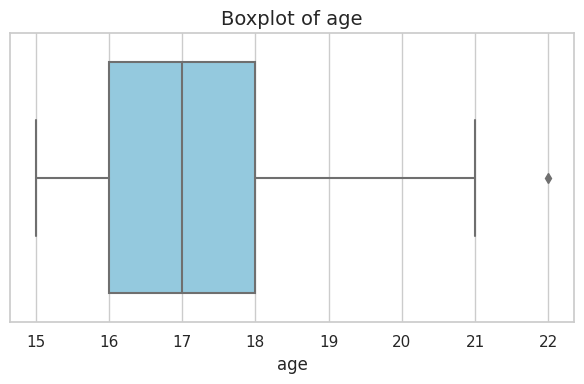

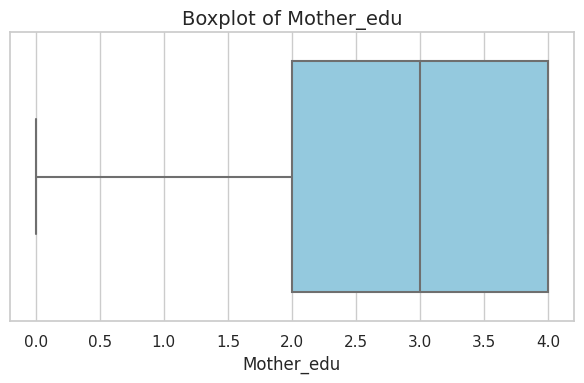

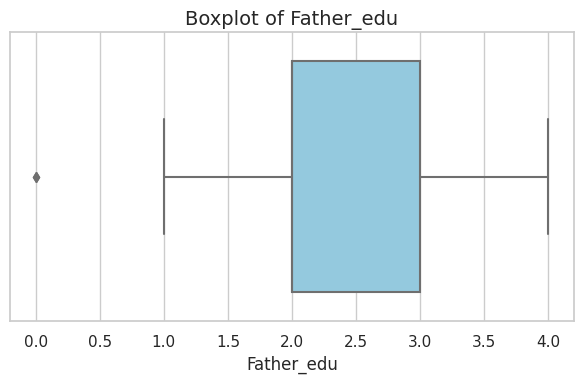

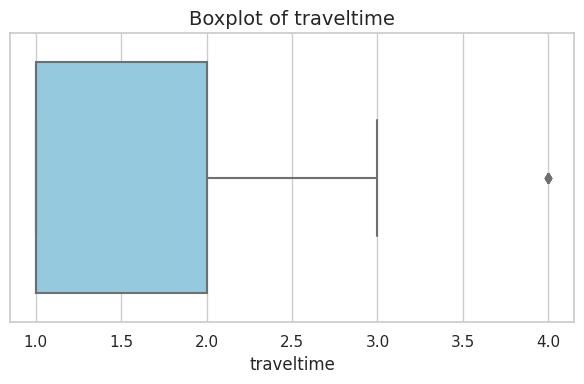

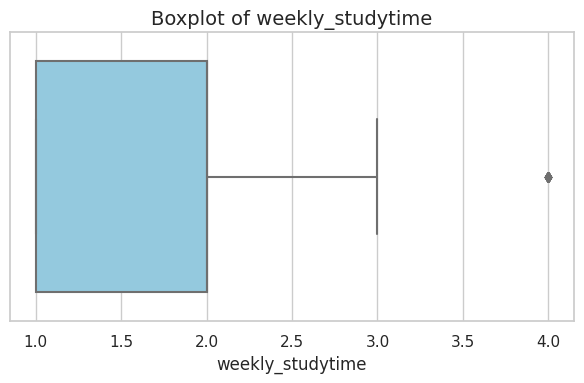

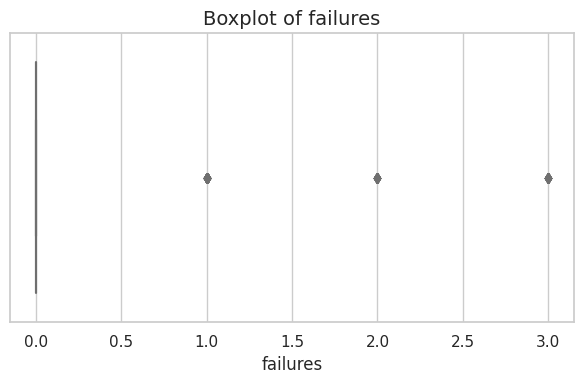

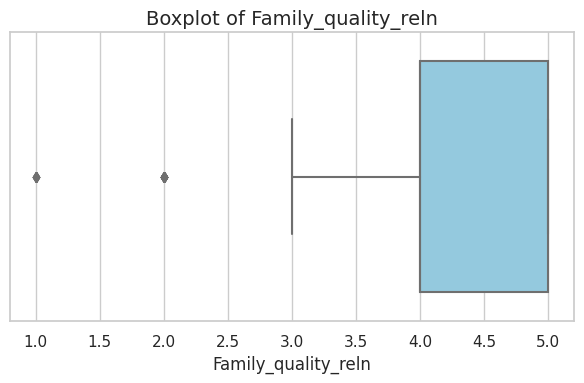

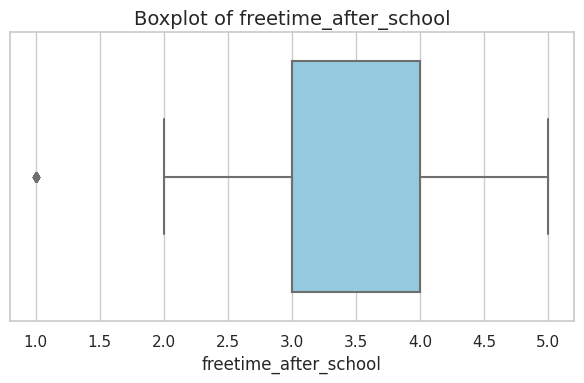

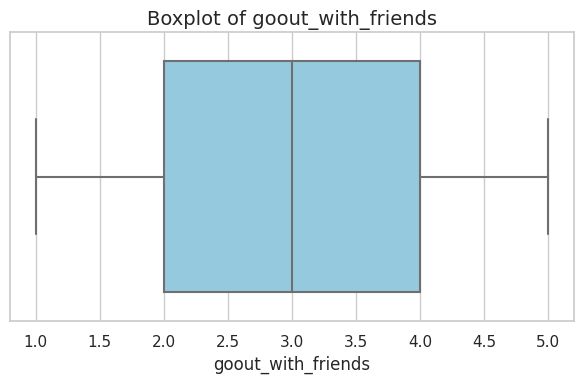

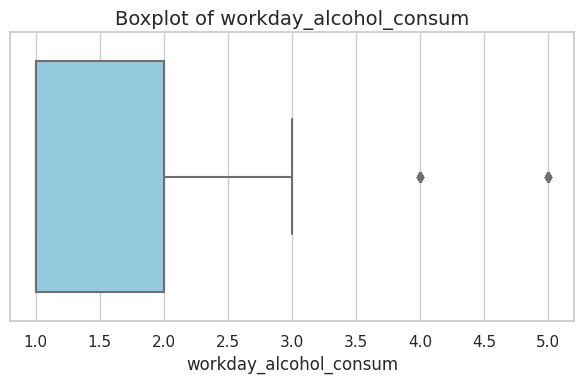

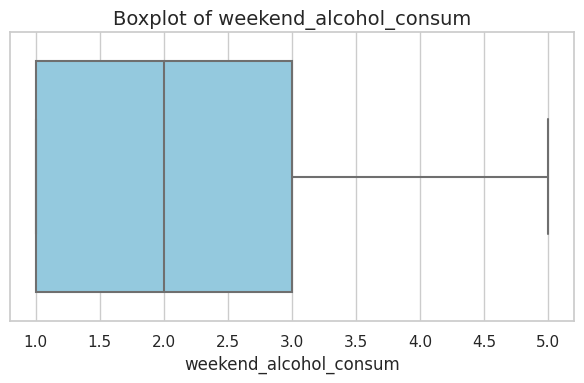

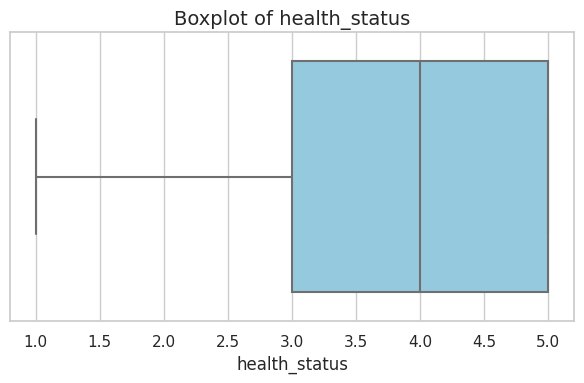

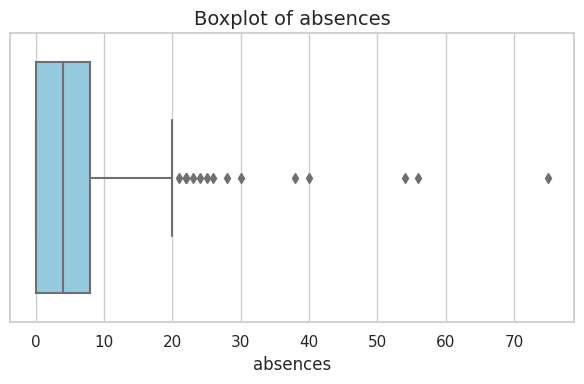

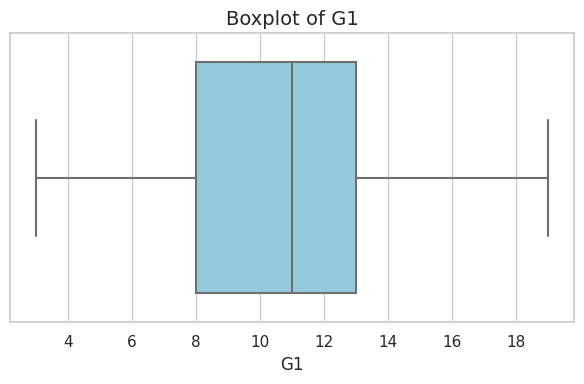

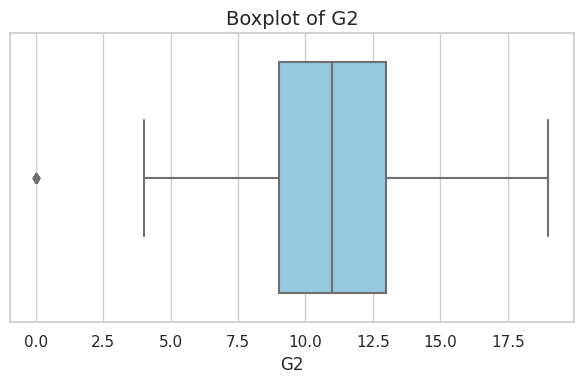

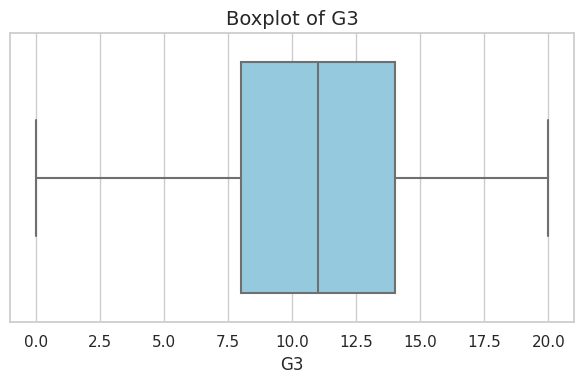

In [47]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.set(style="whitegrid")
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [95]:
df.drop(df[df['age'] > 19].index, inplace=True)

In [96]:
df.reset_index()

,index,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,...,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,3,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,4,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,388,MS,F,18,U,LE3,T,3,1,teacher,...,4,3,4,1,1,1,0,7,9,8
386,389,MS,F,18,U,GT3,T,1,1,other,...,1,1,1,1,1,5,0,6,5,0
387,391,MS,M,17,U,LE3,T,3,1,services,...,2,4,5,3,4,2,3,14,16,16
388,393,MS,M,18,R,LE3,T,3,2,services,...,4,4,1,3,4,5,0,11,12,10


In [98]:
df['address']=df['address'].replace({'U':'urban'})
df['address']=df['address'].replace({'R':'rural'})
df['school']=df['school'].replace({'GP':"Gabriel Pereira"})
df['school']=df['school'].replace({'MS':"Mousinho da Silveira"})
df['Parrent_status']=df['Parrent_status'].replace({'T':'Living Together'})
df['Parrent_status']=df['Parrent_status'].replace({'A':'Apart'})

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



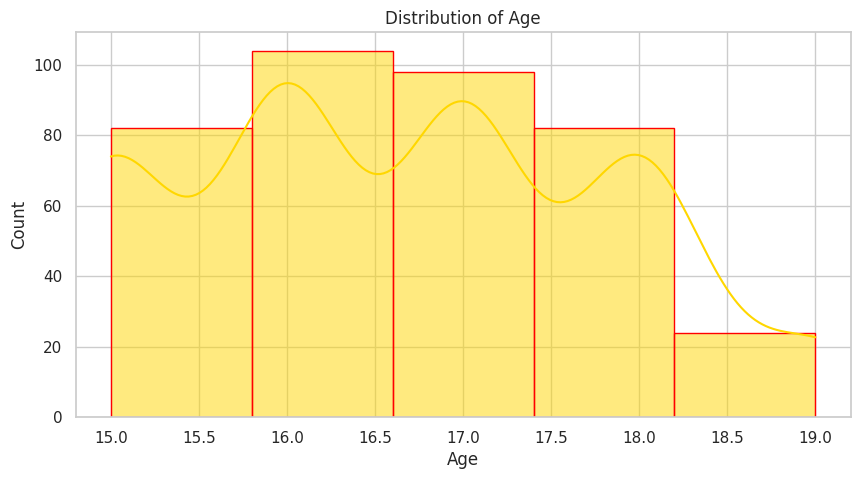

In [61]:
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=5, kde=True,color="gold",edgecolor='red')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



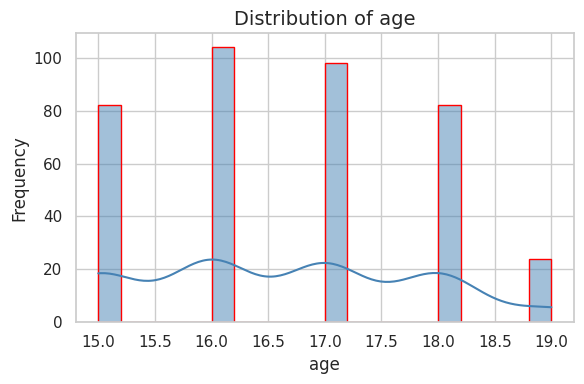

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



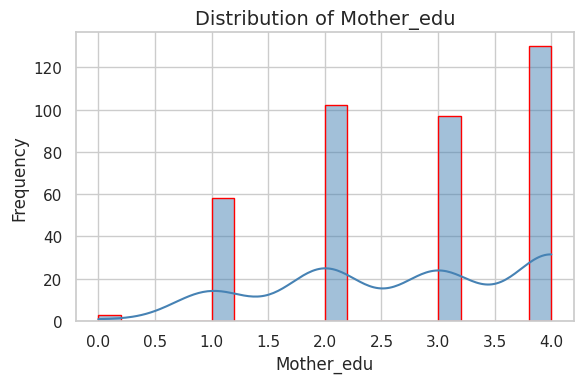

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



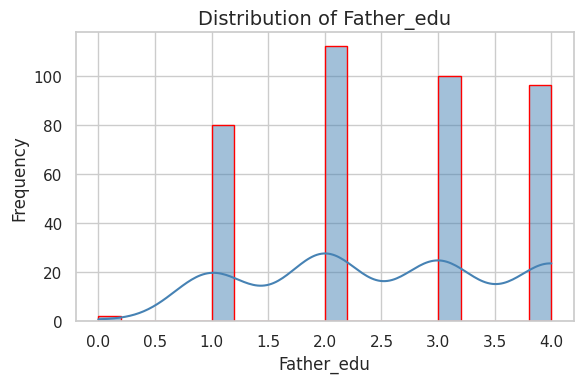

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



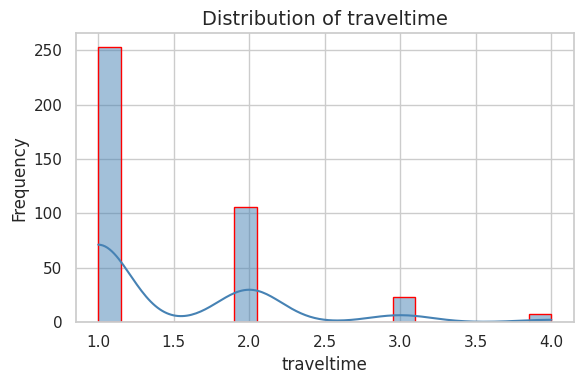

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



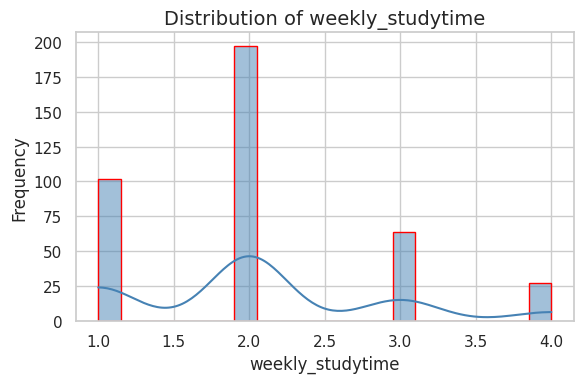

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



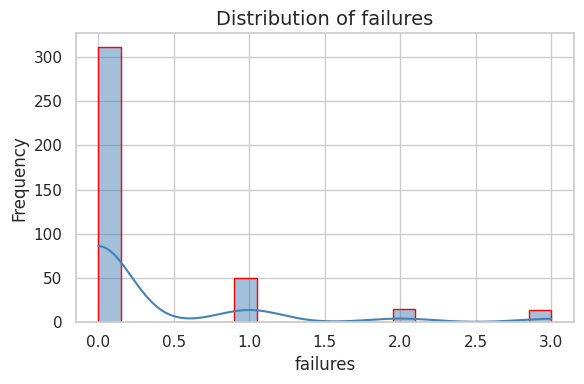

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



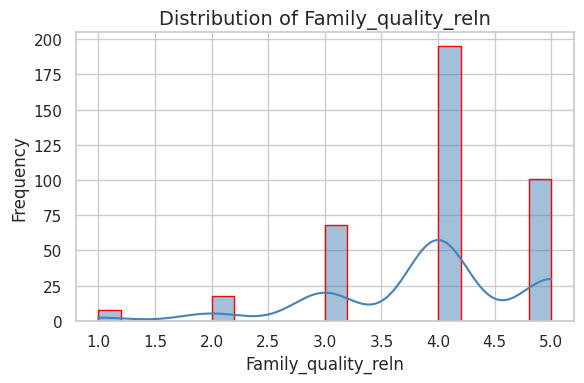

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



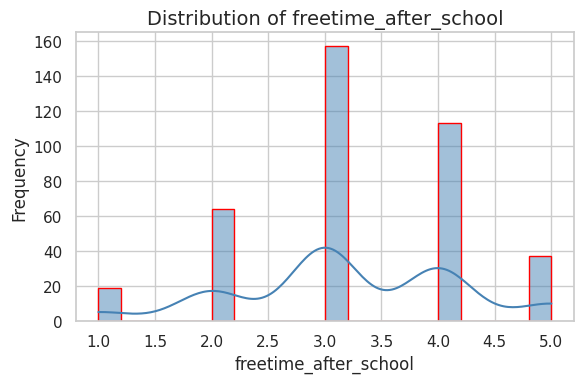

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



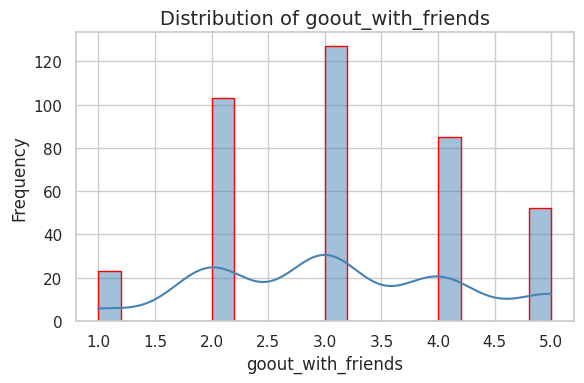

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



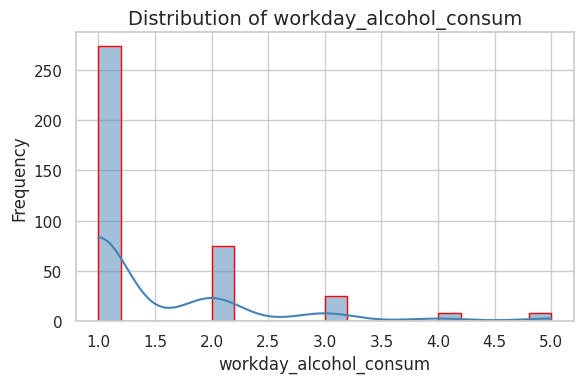

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



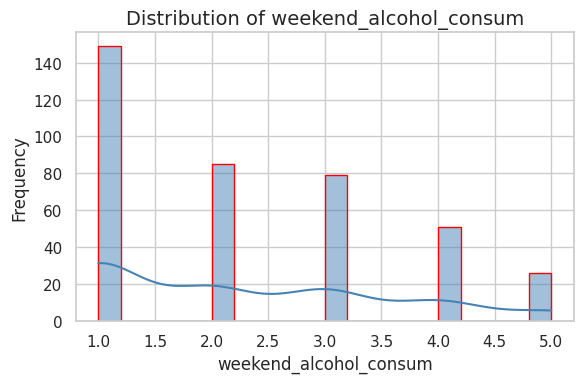

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



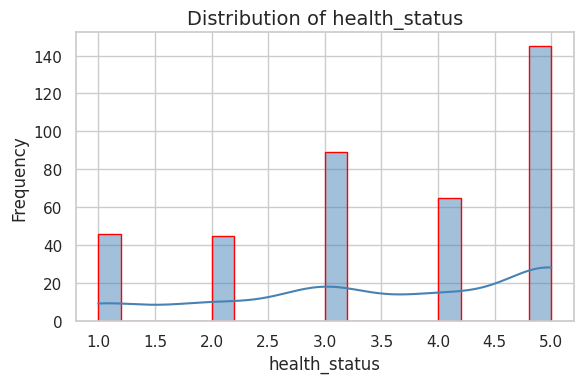

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



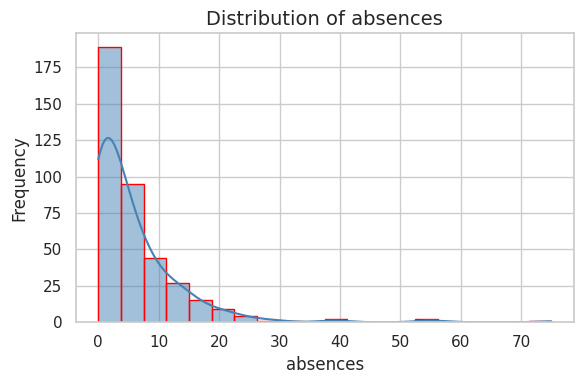

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



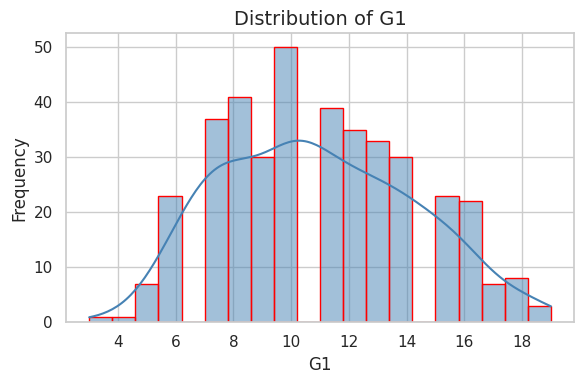

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



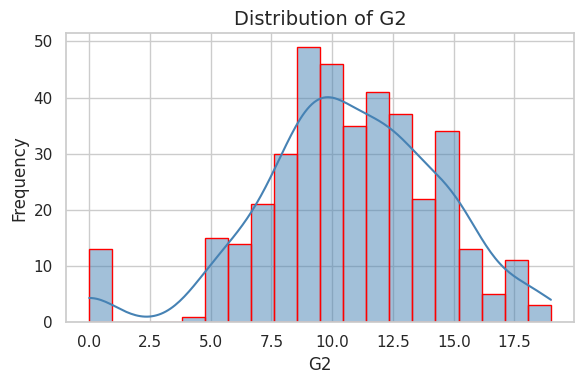

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



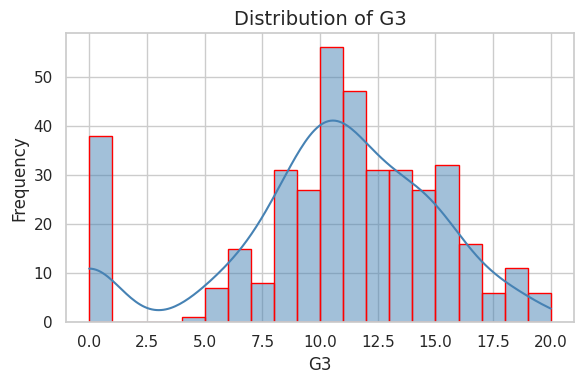

In [74]:
sns.set(style="whitegrid")
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='steelblue', bins=20,edgecolor='red')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

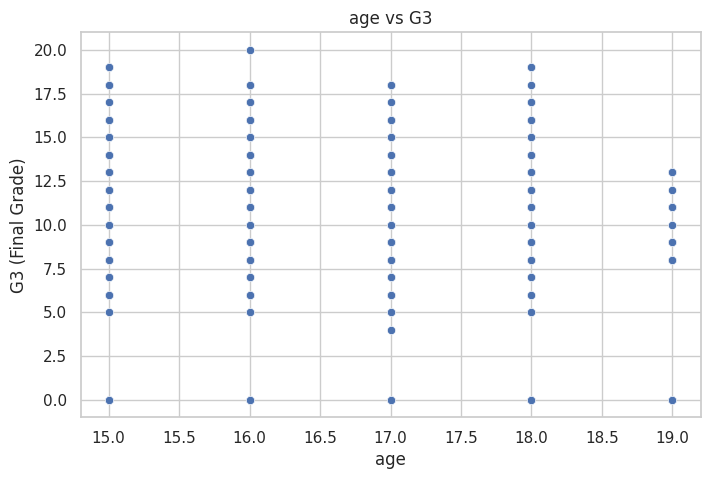

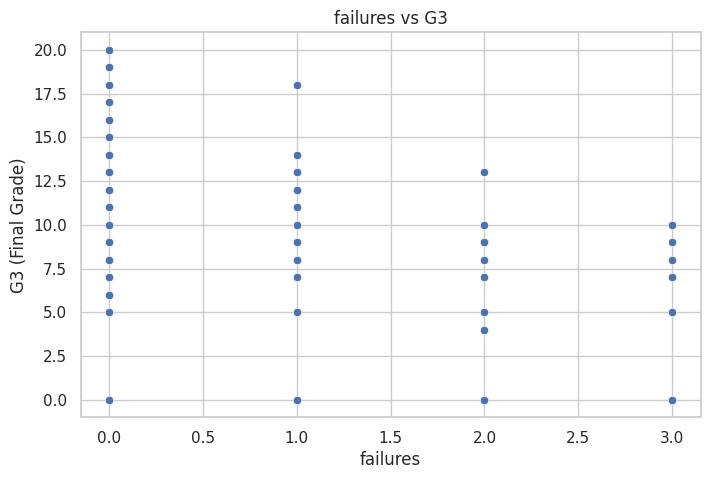

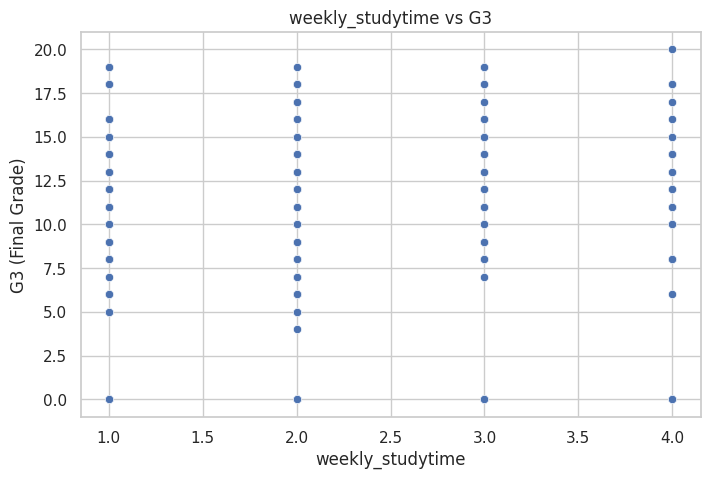

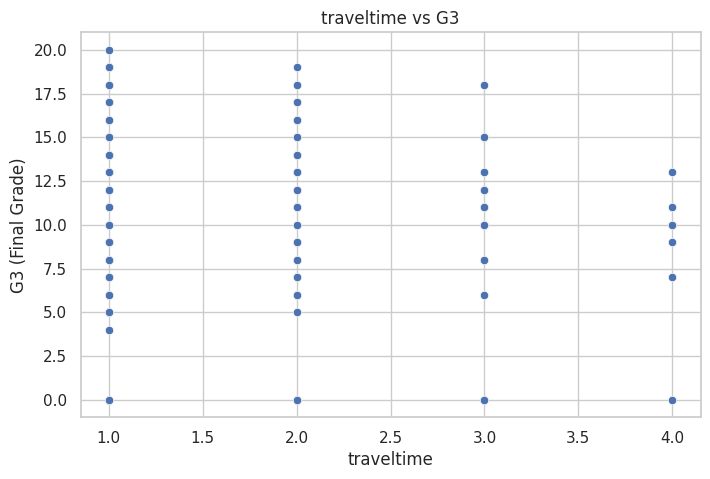

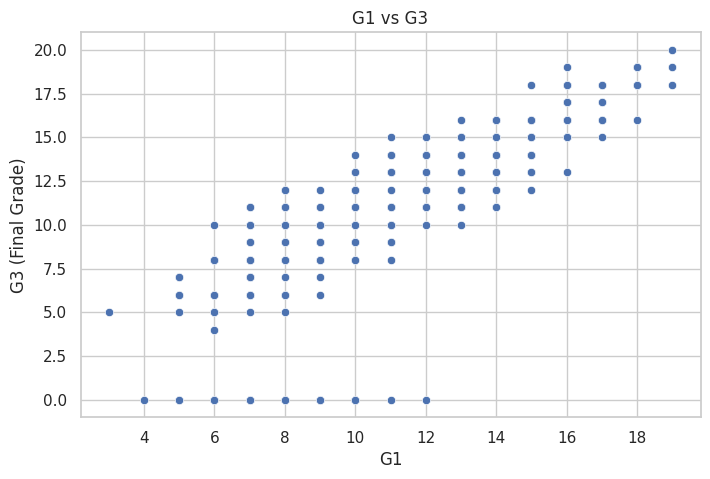

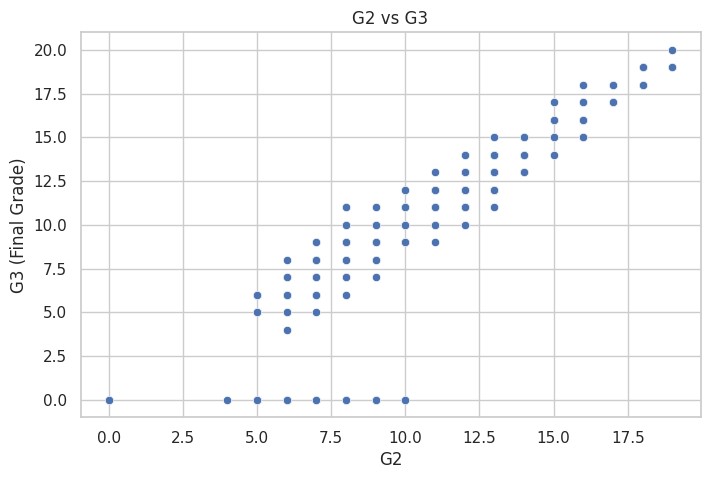

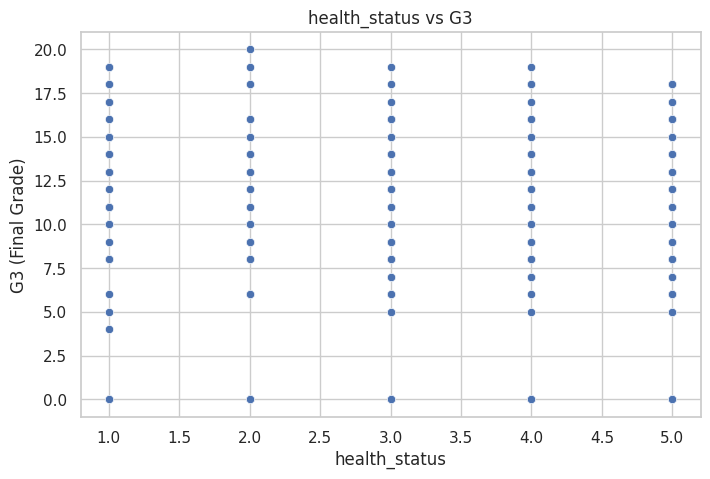

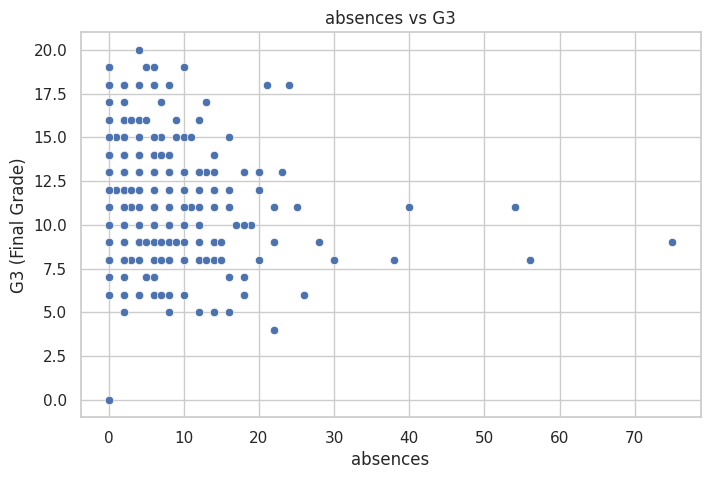

In [85]:
numerical_features = ['age', 'failures', 'weekly_studytime', 'traveltime', 'G1', 'G2', 'health_status', 'absences']

# Scatter plots for numerical features vs. G3
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=feature, y="G3")
    plt.title(f"{feature} vs G3")
    plt.xlabel(feature)
    plt.ylabel("G3 (Final Grade)")
    plt.show()

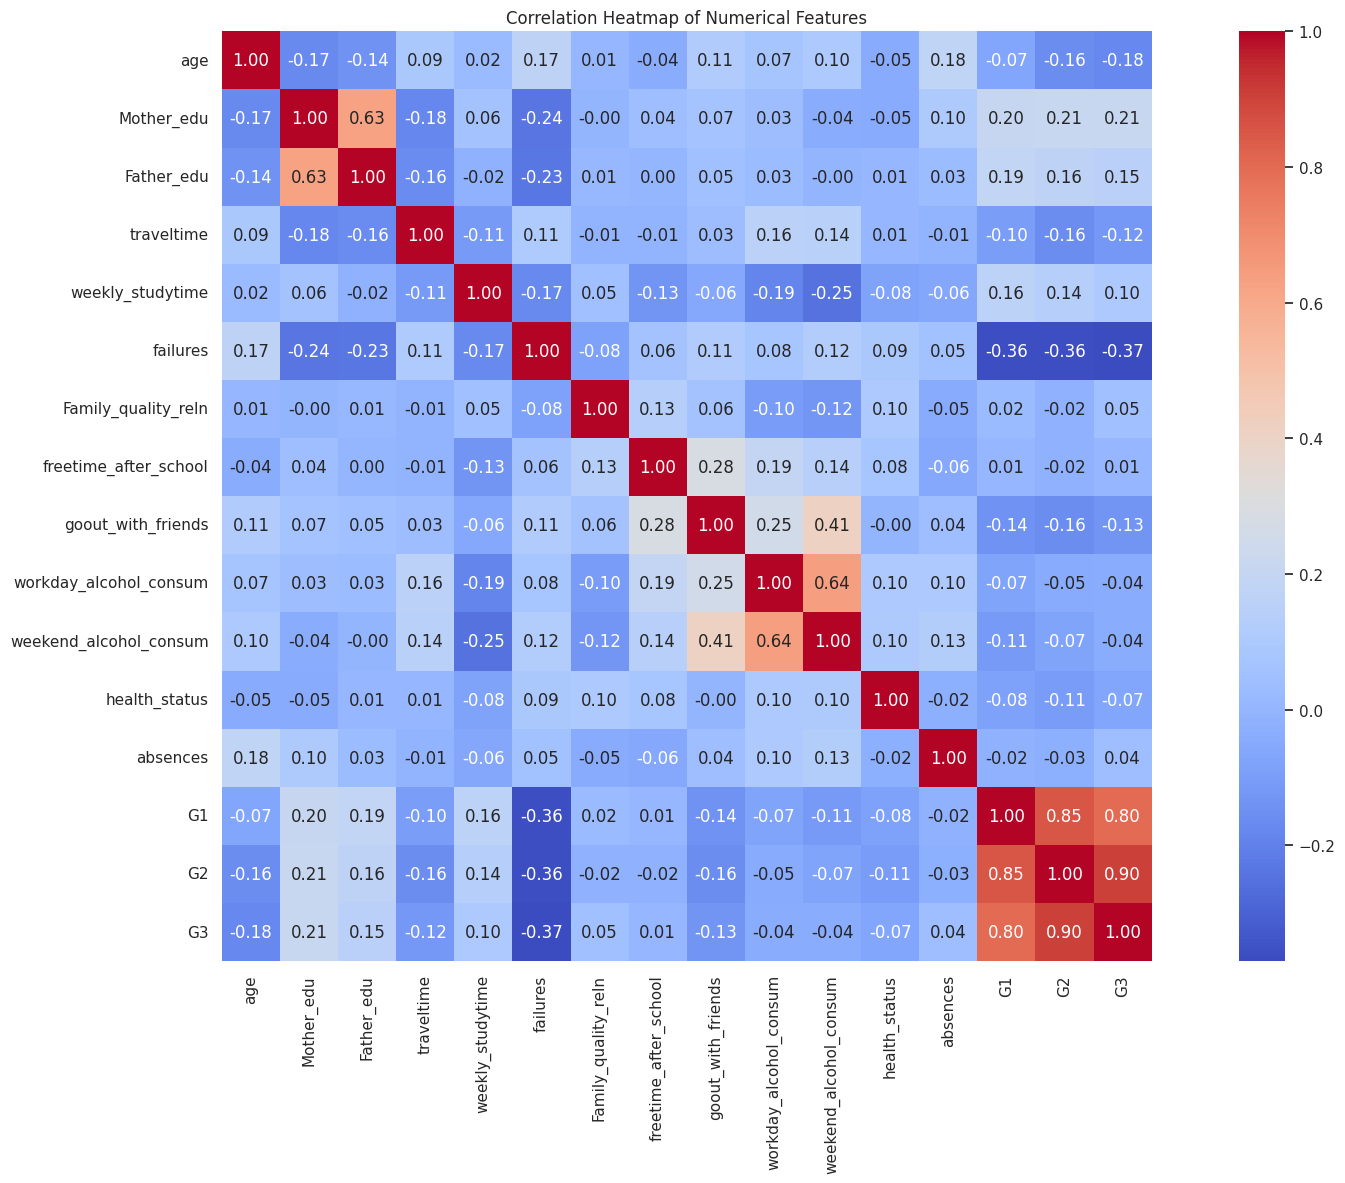

In [81]:
plt.figure(figsize=(18, 12))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

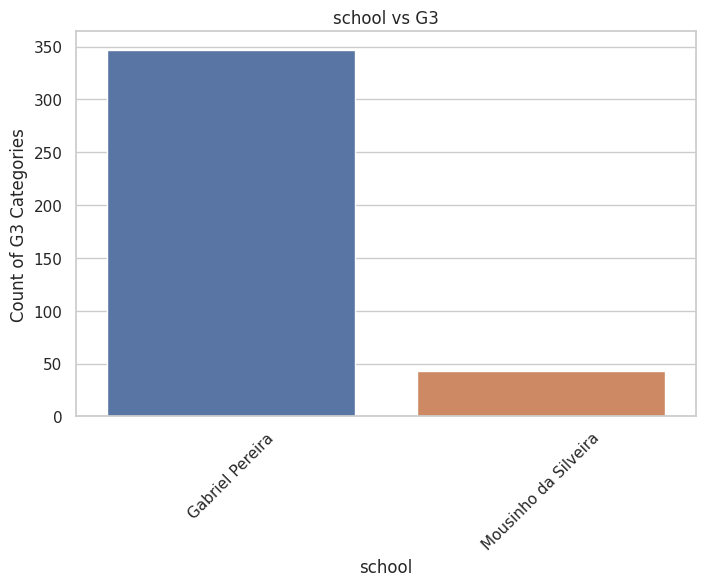

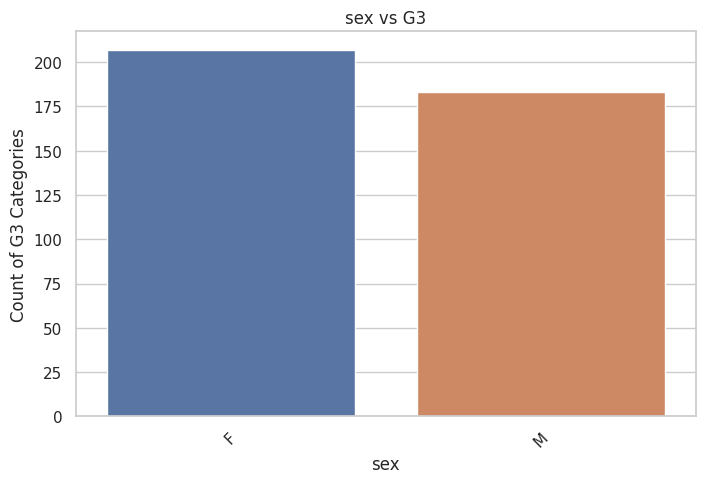

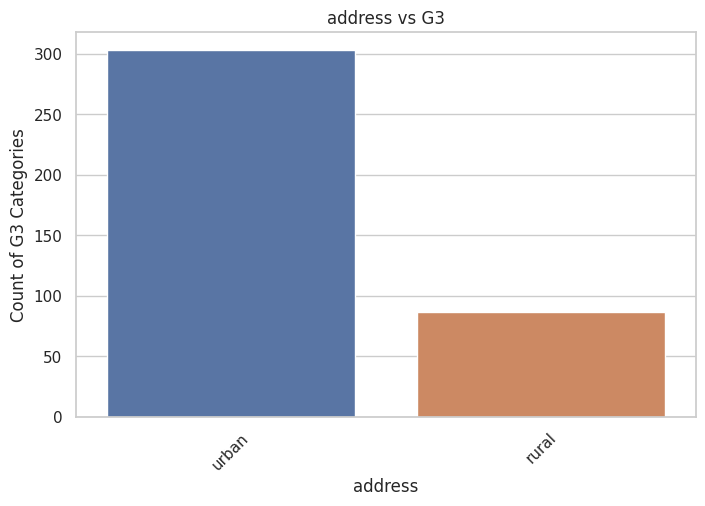

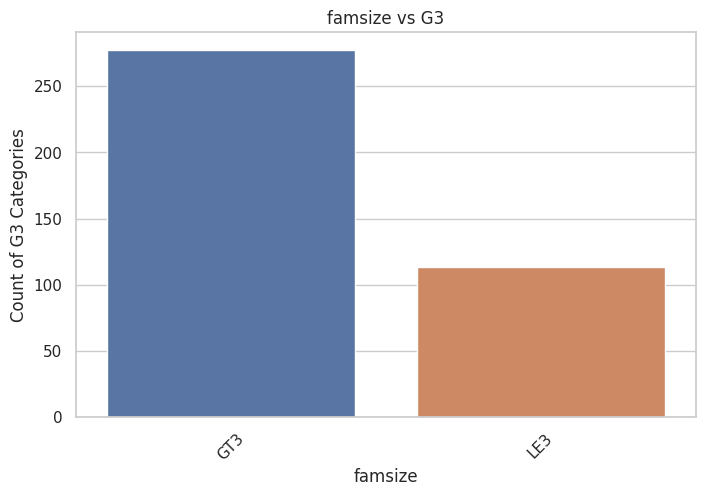

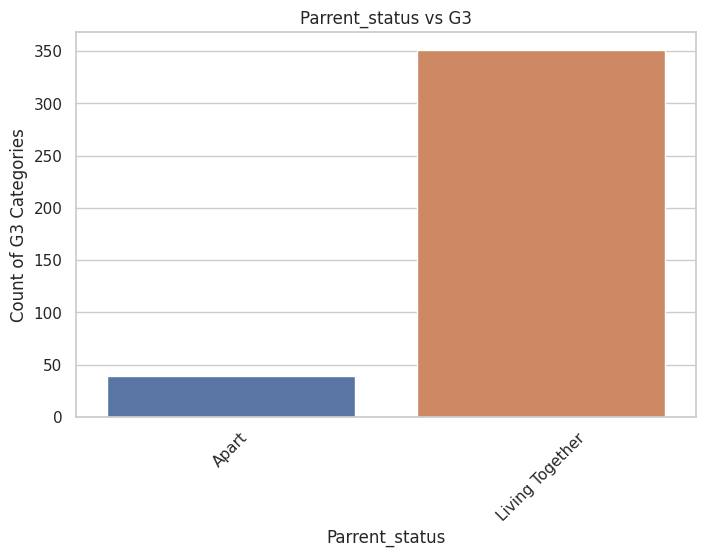

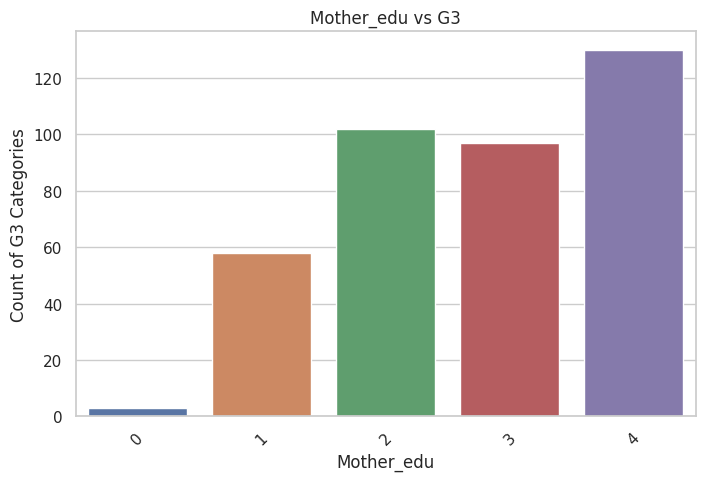

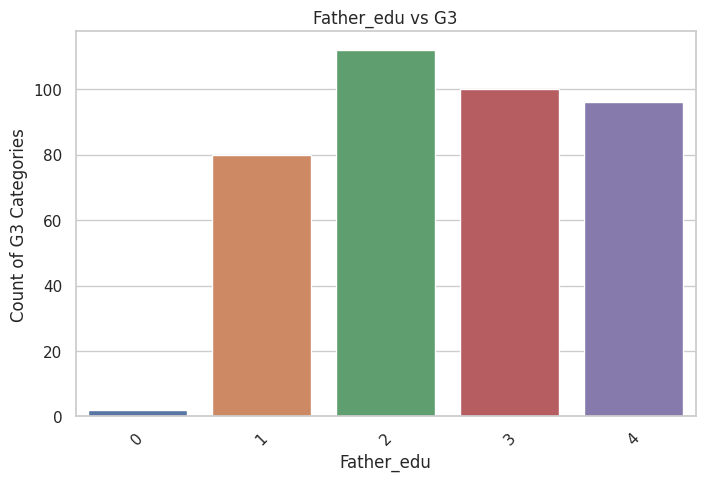

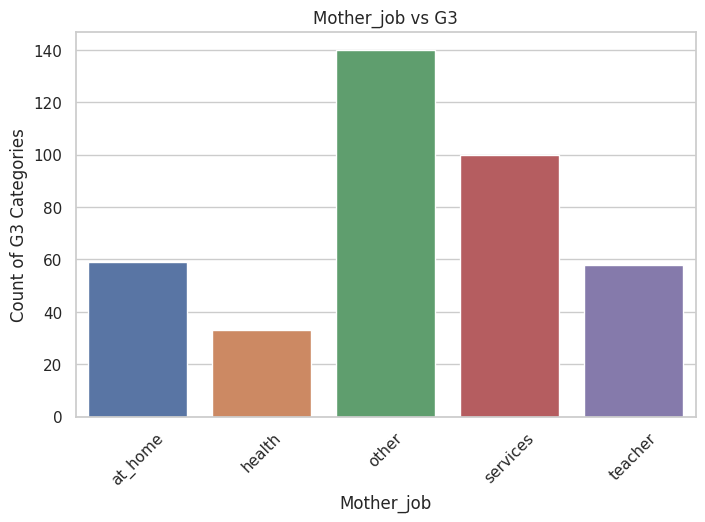

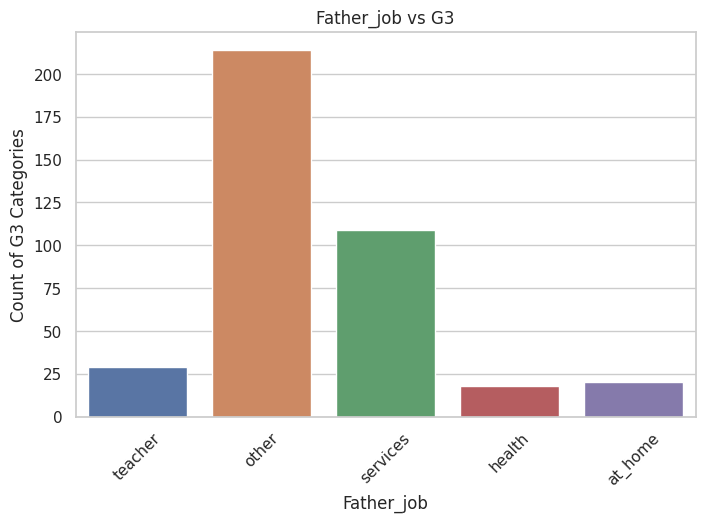

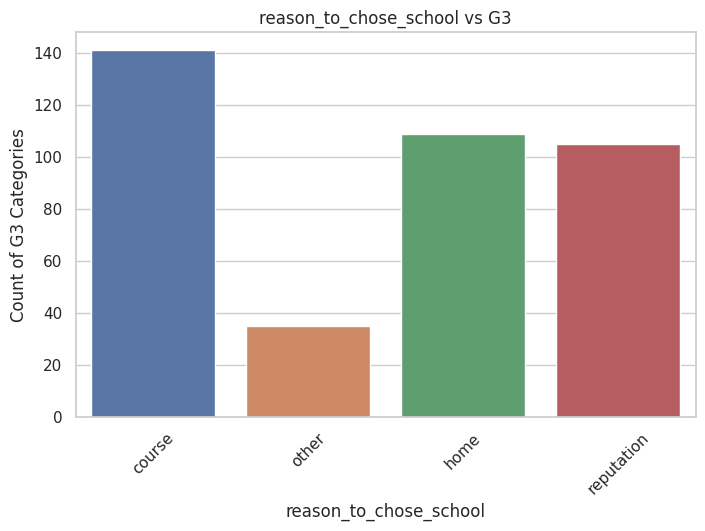

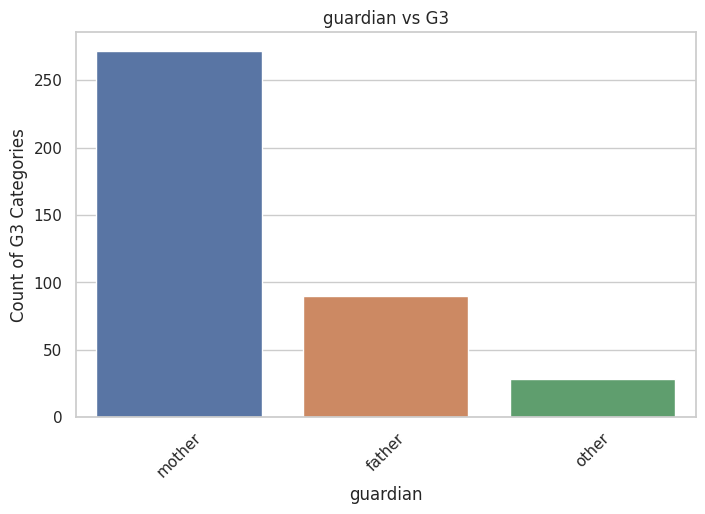

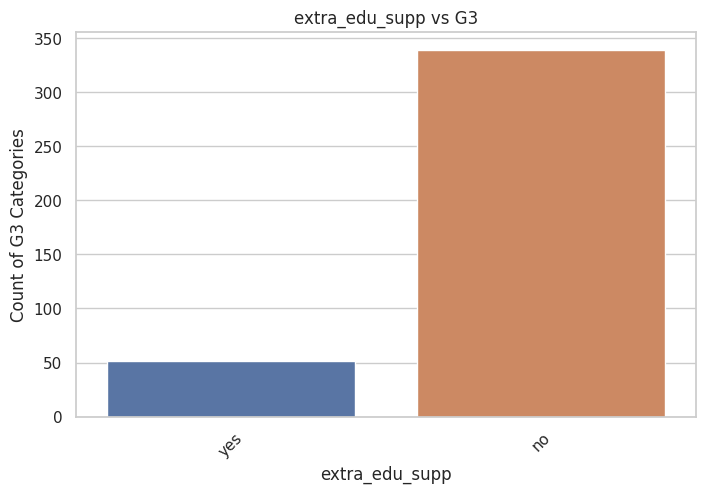

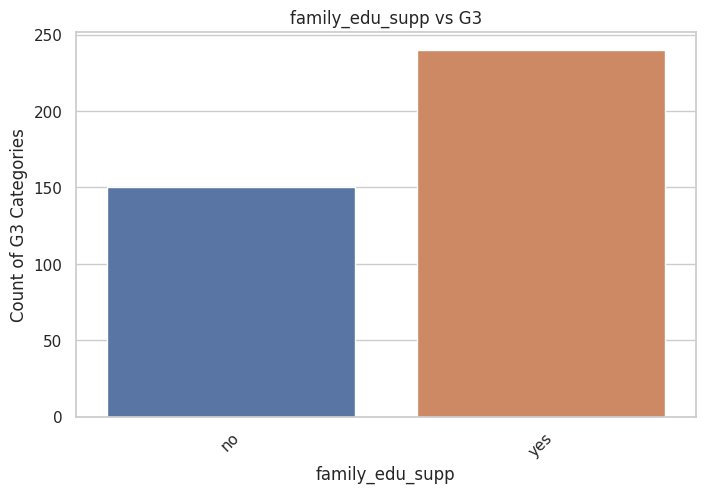

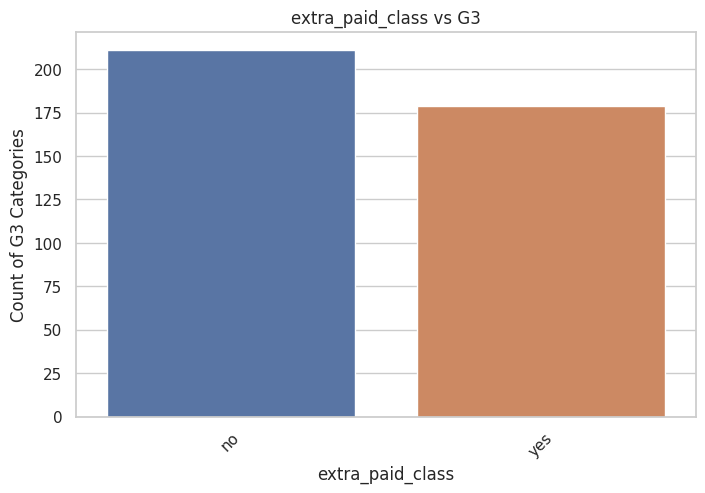

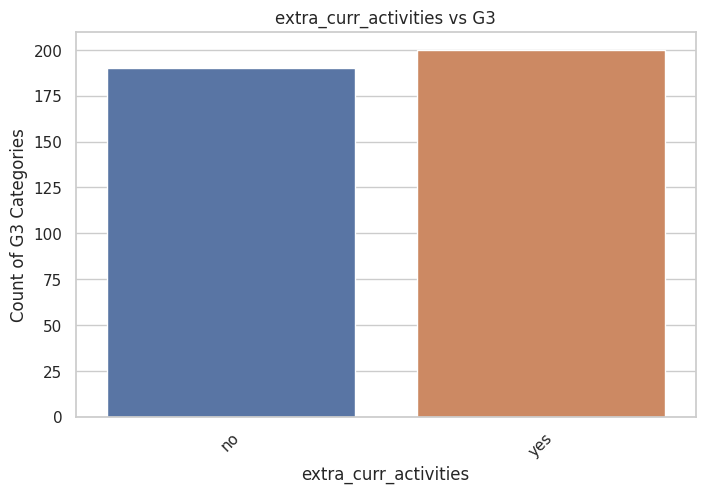

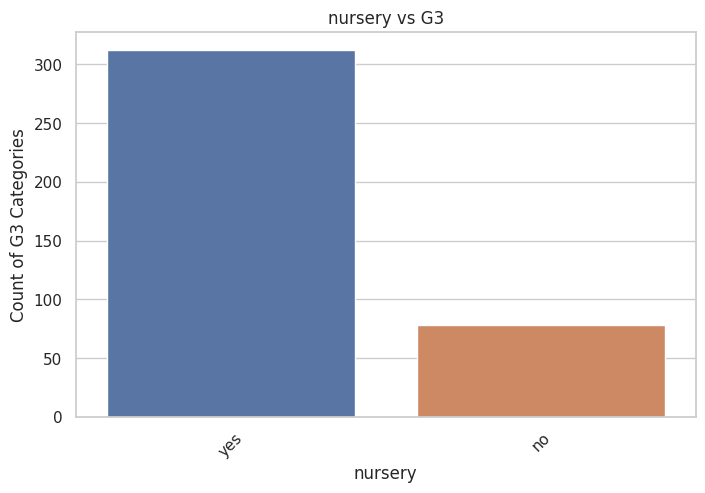

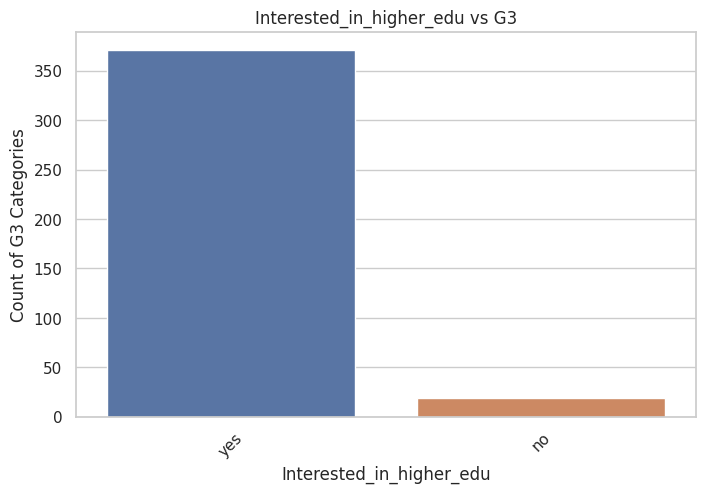

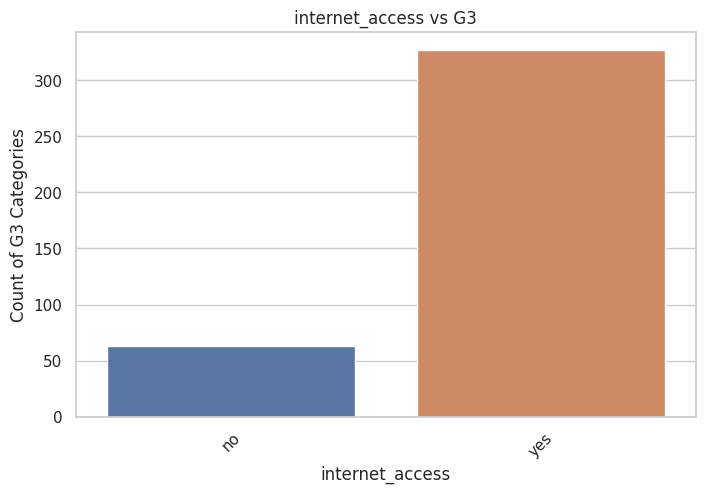

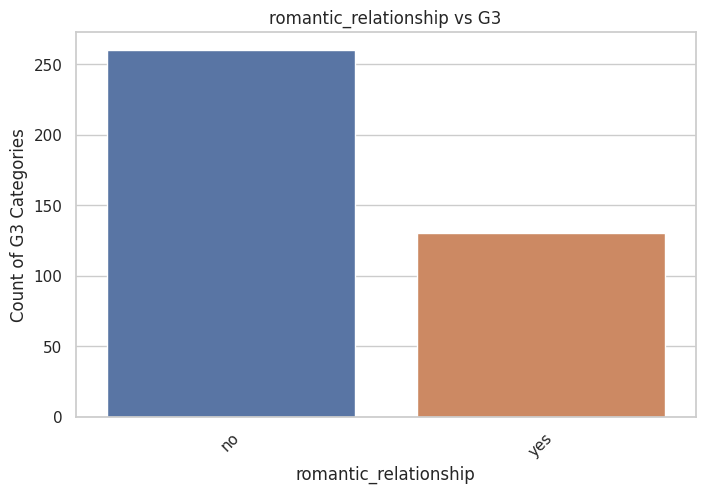

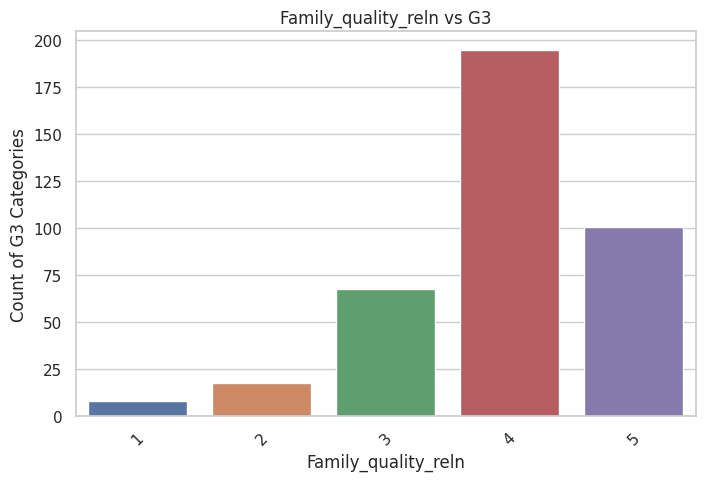

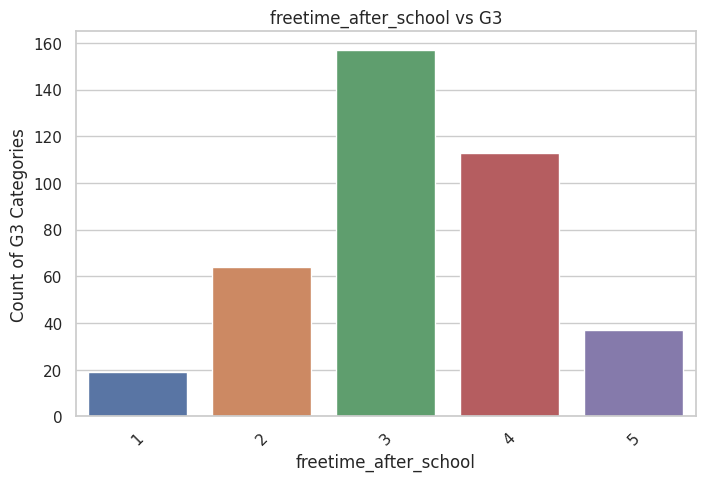

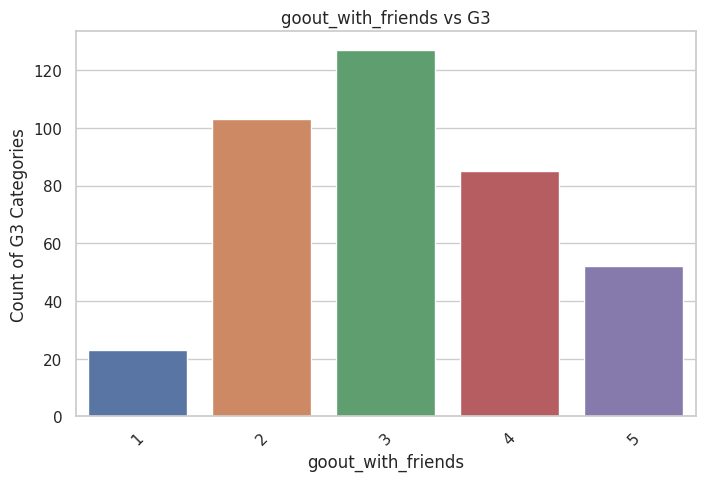

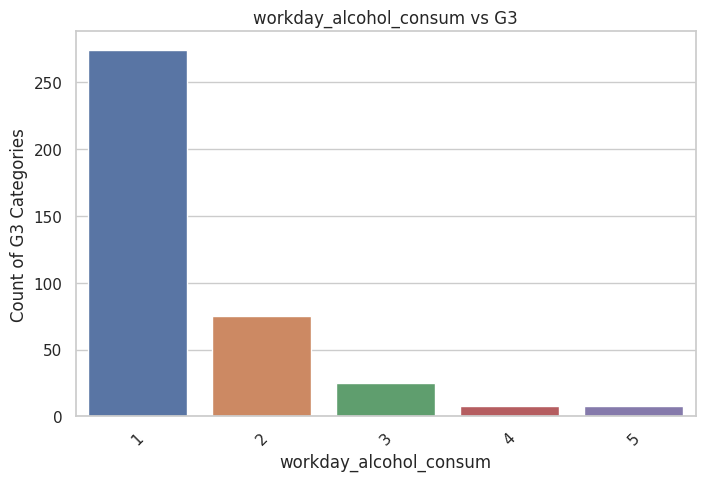

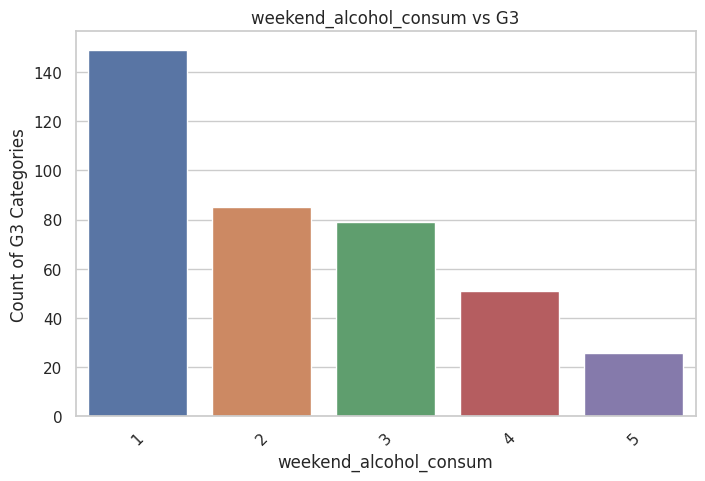

In [91]:
# List of categorical features
categorical_features = ['school', 'sex', 'address', 'famsize', 'Parrent_status', 
                        'Mother_edu', 'Father_edu', 'Mother_job', 'Father_job', 
                        'reason_to_chose_school', 'guardian', 'extra_edu_supp', 
                        'family_edu_supp', 'extra_paid_class', 'extra_curr_activities', 
                        'nursery', 'Interested_in_higher_edu', 'internet_access', 
                        'romantic_relationship', 'Family_quality_reln', 
                        'freetime_after_school', 'goout_with_friends', 'workday_alcohol_consum', 
                        'weekend_alcohol_consum']

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=feature)
    plt.title(f"{feature} vs G3")
    plt.xlabel(feature)
    plt.ylabel("Count of G3 Categories")
    plt.xticks(rotation=45)
    plt.show()


In [99]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 
df.head()


,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
